# IRIS FLOWER CLASSIFICATION

## BHARAT INTERN [TASK3] :

##### Importing necessary libraries

In [1]:
import pandas as pd               #Import Pandas library for data manipulation and analaysis
import matplotlib.pyplot as plt   #Import Matplotlib library for data visualization
import seaborn as sns             #Import Seaborn library for statiscal data visualization      
from sklearn.neighbors import KNeighborsClassifier   #Import KNeighborsClassifier for classification based on data neighbors
from sklearn.model_selection import train_test_split #Import train_test_split function for splittng data
from sklearn.metrics import  accuracy_score          #Import accuracy_score method to calculate the accuracy of classification model
from sklearn.metrics import classification_report    #Import classification_report function for detailed clssification metrics

In [2]:
df=pd.read_csv('IRIS.csv')

#### Understanding the data

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Checking missing values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Visualizing the data

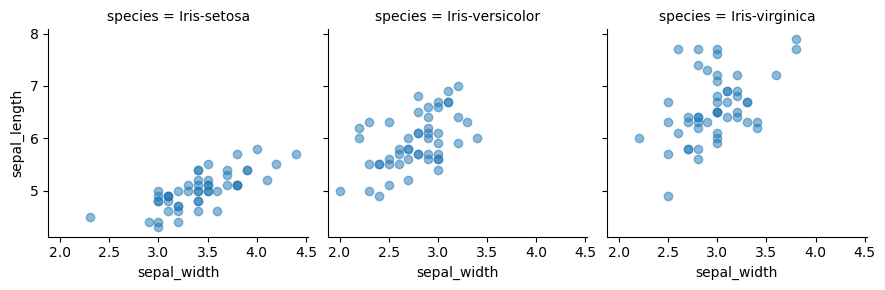

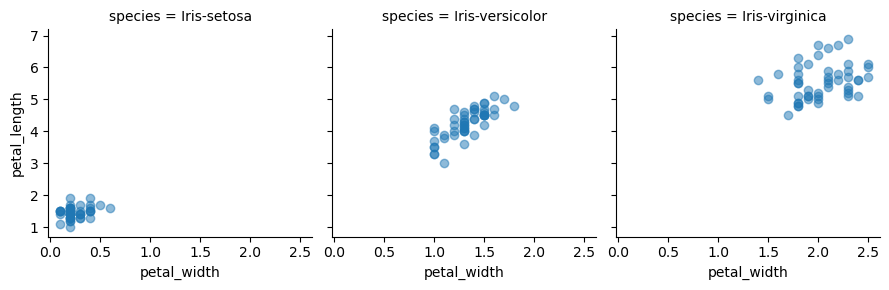

In [6]:
#Visualizing the distribution of variables
sepal=sns.FacetGrid(df,col='species')
sepal.map(plt.scatter, 'sepal_width' ,'sepal_length' , alpha =0.5)

petal=sns.FacetGrid(df,col='species')
petal.map(plt.scatter ,'petal_width','petal_length' , alpha =0.5)

##### Splitting training and testing set

In [7]:
#Defining feature X and target variable y
X=df.drop(('species'),axis=1)
y=df['species']

#Splitting the data (80% for training)(20% for testing)
X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size = 0.2)

print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


#### Create and  train the KNN Classifier

In [8]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#Make predictions on the testing set
y_predicted=knn.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Evaluate the model

In [10]:
accuracy=accuracy_score(y_test,y_predicted)
print("Accuracy:",accuracy)

Accuracy: 0.9333333333333333


##### Classification report

In [11]:
#Print classification report for more deatiled evaluation
print(classification_report(y_test,y_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.95      0.95        30
   weighted avg       0.94      0.93      0.93        30

